In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('/content/insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
data.shape

(1338, 7)

In [6]:
print("No. of Rows: ",data.shape[0])
print("No. of Columns: ",data.shape[1])

No. of Rows:  1338
No. of Columns:  7


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
#converting sex,smoker & region into numerical
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [11]:
data['sex']= data['sex'].map({'female':0,'male':1})

In [12]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [13]:
data['smoker']=data['smoker'].map({'yes':1,'no':0})

In [14]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [15]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [16]:
data['region']=data['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [17]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [18]:
# Independent variable
x=data.drop('charges',axis=1)

In [19]:
# Target variable
y=data['charges']

In [20]:
# Splitting data into training  testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
# importing the model

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [22]:
# model training

# LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

# support vector machine
svm = SVR()
svm.fit(x_train,y_train)

# RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

# GradientBoostingRegressor
gr = GradientBoostingRegressor()
gr.fit(x_train,y_train)

GradientBoostingRegressor()

In [23]:
# prediction on test data

y_pred1 = lr.predict(x_test)
y_pred2 = svm.predict(x_test)
y_pred3 = rf.predict(x_test)
y_pred4 = gr.predict(x_test)

df1= pd.DataFrame({'Actual':y_test,'lr':y_pred1,
                   'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [24]:
df1

,Actual,lr,svm,rf,gr
764,9095.06825,8924.407244,9548.261584,11520.222481,11001.128629
887,5272.17580,7116.295018,9492.515425,5131.476272,5840.174656
890,29330.98315,36909.013521,9648.758701,28259.946327,28001.980112
1293,9301.89355,9507.874691,9555.044136,9897.901645,9745.291602
259,33750.29180,27013.350008,9420.421978,34600.094058,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,46742.254249,45431.423211
575,12222.89830,11814.555568,9625.431547,12469.758509,12465.025294
535,6067.12675,7638.107736,9504.168517,6509.079736,6974.336525
543,63770.42801,40959.081722,9605.004594,46664.955544,47862.047791


In [25]:
# comparing performance visually

import matplotlib.pyplot as plt

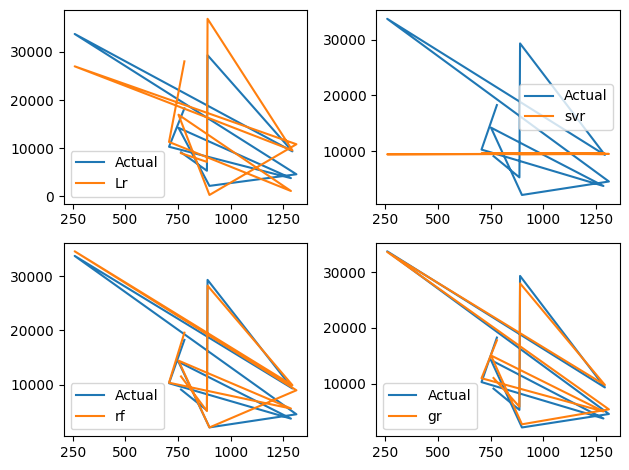

In [26]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['lr'].iloc[0:11],label="Lr")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svr")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")

plt.tight_layout()

plt.legend()

In [27]:
# evaluating the algorithm

from sklearn import metrics

In [28]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [29]:
print(score1,score2,score3,score4)

0.7833463107364539 -0.07229762787861826 0.8619181886094303 0.8779936181637191


In [30]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [31]:
print(s1,s2,s3,s4)

4186.508898366434 8592.428727899724 2510.9713785998283 2447.167158715136


In [32]:
# predicting charges for new customers

data={'age':40,'sex':1,'bmi':40.30,'children':4,'smoker':1,'region':2}
df=pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [33]:
new_pred=gr.predict(df)
print(new_pred)

[43839.34586293]


In [34]:
# saving model using joblib

import joblib

In [35]:
gr = GradientBoostingRegressor()
gr.fit(x,y)

GradientBoostingRegressor()

In [36]:
joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [37]:
model=joblib.load('model_joblib_gr')

In [38]:
model.predict(df)

array([42148.361888])

In [39]:
# GUI

from tkinter import *

In [40]:
import joblib

In [44]:
master= Tk()
master.title("Insurance Cost Prediction")
Label=Label(master,text="Insurance Cost Prediction",bg="black",
            fg="white").grid(row=0,columnspan=2)

Label(master,text="Enter Your Age").grid(row=1)
Label(master,text="Male or Female [1/0]").grid(row=2)
Label(master,text="Enter Your BMI Value").grid(row=3)
Label(master,text="Enter Number of Childern").grid(row=4)
Label(master,text="Smoker Yes/No [1/0]").grid(row=5)
Label(master,text="Region [1-4]").grid(row=6)

e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)

def show_entry():
  p1=float(e1.get())
  p2=float(e2.get())
  p3=float(e3.get())
  p4=float(e4.get())
  p5=float(e5.get())
  p6=float(e6.get())

  model=joblib.load('model_joblib_gr')
  result=model.predict([[p1,p2,p3,p4,p5,p6]])

  Label(master,text="Insurance Cost").grid(row=7)
  Label(master,text=result).grid(row=8)

Button(master,text="Predict",command=lambda:show_entry()).grid()


mainloop()